# Clickbait Challenge at SemEval 2023 - Clickbait Spoiling

Task 1 on Spoiler Type Classification: The input is the clickbait post and the linked document. The task is to classify the spoiler type that the clickbait post warrants (either "phrase", "passage", "multi"). For each input, an output like ```{"uuid": "<UUID>", "spoilerType": "<SPOILER-TYPE>"}``` has to be generated where <SPOILER-TYPE> is either phrase, passage, or multi.
    
For each entry in the training and validation dataset, the following fields are available:

* uuid: The uuid of the dataset entry.
* postText: The text of the clickbait post which is to be spoiled.
* **targetParagraphs**: The main content of the linked web page to classify the spoiler type ***(task 1)*** and to generate the spoiler (task 2). Consists of the paragraphs of manually extracted main content.
* **targetTitle**: The title of the linked web page to classify the spoiler type ***(task 1)*** and to generate the spoiler (task 2).
* targetUrl: The URL of the linked web page.
* humanSpoiler: The human generated spoiler (abstractive) for the clickbait post from the linked web page. This field is only available in the training and validation dataset (not during test).
* spoiler: The human extracted spoiler for the clickbait post from the linked web page. This field is only available in the training and validation dataset (not during test).
* spoilerPositions: The position of the human extracted spoiler for the clickbait post from the linked web page. This field is only available in the training and validation dataset (not during test).
* **tags**: The spoiler type (might be "phrase", "passage", or "multi") that is to be classified in ***task 1*** (spoiler type classification). For task 1, this field is only available in the training and validation dataset (not during test). For task 2, this field is always available and can be used.

Some fields contain additional metainformation about the entry but are unused: postId, postPlatform, targetDescription, targetKeywords, targetMedia.

### Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Preprocessing
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xmart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xmart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import preprocessing

In [4]:
# Metrics
from sklearn import metrics

In [59]:
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

### Read data

In [6]:
def create_df_from_jsonl(path, binary=False):
    df = pd.read_json(path, lines=True)
    df['document'] = df['postText'].apply(', '.join) + df['targetParagraphs'].apply(' '.join)
    df['tags'] = df['tags'].apply(', '.join)
    if binary:
        df = df[(df['tags'] == 'passage') | (df['tags'] == 'phrase')]
        df.reset_index(inplace=True)
    return df[['document', 'tags']]

In [7]:
train_df = create_df_from_jsonl('data/train.jsonl')
train_df.head(3)

,document,tags
0,"Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had Better IdeaIt’ll be just like old times this weekend for Tom Brady and Wes Welker. Welker revealed Friday morning on a Miami radio station that he contacted Brady because he’ll be in town for Sunday’s game between the New England Patriots and Miami Dolphins at Gillette Stadium. It seemed like a perfect opportunity for the two to catch up. But Brady’s definition of ""catching up"" involves far more than just a meal. In fact, it involves some literal ""catching"" as the Patriots quarterback looks to stay sharp during his four-game Deflategate suspension. ""I hit him up to do dinner Saturday night. He’s like, ‘I’m going to be flying in from Ann Arbor later (after the Michigan-Colorado football game), but how about that morning we go throw?’ "" Welker said on WQAM, per The Boston Globe. ""And I’m just sitting there, I’m like, ‘I was just thinking about dinner, but yeah, sure. I’ll get over there early and we can throw a little bit.’ "" Welker was one of Brady’s favorite targets for six seasons from 2007 to 2012. It’s understandable him and Brady want to meet with both being in the same area. But Brady typically is all business during football season. Welker probably should have known what he was getting into when reaching out to his buddy. ""That’s the only thing we really have planned,"" Welker said of his upcoming workout with Brady. ""It’s just funny. I’m sitting there trying to have dinner. ‘Hey, get your ass up here and let’s go throw.’ I’m like, ‘Aw jeez, man.’ He’s going to have me running like 2-minute drills in his backyard or something."" Maybe Brady will put a good word in for Welker down in Foxboro if the former Patriots wide receiver impresses him enough.",passage
1,"NASA sets date for full recovery of ozone hole2070 is shaping up to be a great year for Mother Earth. That's when NASA scientists are predicting the hole in the ozone layer might finally make a full recovery. Researchers announced their conclusion, in addition to other findings, in a presentation Wednesday during the annual American Geophysical Union meeting in San Francisco. The team of scientists specifically looked at the chemical composition of the ozone hole, which has shifted in both size and depth since the passing of the Montreal Protocol in 1987. The agreement banned its 197 signatory countries from using chemicals, like chlorofluorocarbons (CFCs), that break down into chlorine in the upper atmosphere and harm the ozone layer. They found that, while levels of chlorine in the atmosphere have indeed decreased as a result of the protocol, it's too soon to tie them to a healthier ozone layer. ""Ozone holes with smaller areas and a larger total amount of ozone are not necessarily evidence of recovery attributable to the expected chlorine decline,"" Susan Strahan of NASA's Goddard Space Flight Center explained in a media briefing. ""That assumption is like trying to understand what's wrong with your car's engine without lifting the hood."" Instead, the scientists believe the most recent ozone hole changes, including both the largest hole ever, in 2006, and one of the smallest holes, in 2012, are primarily due to weather. Strong winds have the ability to move ozone in large quantities, effectively blocking the hole some years, while failing to block it in others. ""At the moment, it is winds and temperatures that are really controlling how big [the ozone hole] is,"" Strahan told the BBC. LiveScience reports weather is expected to be the predominant factor in the ozone hole's size until 2025, at which point CFCs will have dropped enough as a result of the Montreal Protocol to become noticeable. By 2070, however, the ozone hole is expected to have made a full recovery. ""It’s not going to be a smooth ride,"" Strahan cautioned the Los Angeles Times. ""There will be some bumps in the road, but overall the trend is downward.""",phrase
2,"This is what makes employees happy -- and i

In [8]:
validation_df = create_df_from_jsonl('data/validation.jsonl')
validation_df.head(3)

document  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Five Nights at Freddy’s Sequel Delayed for Weird ReasonFive Nights at Freddy’s creator Scott Cawthon takes to Steam to tease a possible delay for Five Nights at Freddy’s: Sister Location, the fifth game in the series. For the past couple of years, horror gaming fans have been able to look forward to one new entry in the Five Nights at Freddy’s series after another, with four core games, one RPG spinoff, and a novel released so far. The next game in the franchise, Five Nights at Freddy’s: Sister Location, was scheduled to release this coming Friday, October 7th, but if developer Scott Cawthon is to be believed, the project has been delayed by a few months. According to a post by Cawthon on the Five Nights at Freddy’s: Sister Location Steam page, the game is being delayed because it’s too dark. Cawthon said that some of the plot elements are so disturbing that they are making him feel sick, and so he is thinking about delaying the game so that he can rework it entirely "into something kid-friendly." Delays happen in the gaming industry all the time, but it’s rare for a game to be delayed mere days before its release. Five Nights at Freddy’s fans are confused and angry about this latest development, as many were looking forward to playing the game on Friday. Something else upsetting fans is Cawthon’s reasoning that the game is too dark to release, as being dark and disturbing are two characteristics that many consumers look for in a horror game. Cawthon’s reason for suddenly delaying Five Nights at Freddy’s Sister Location from its planned October 7th release date doesn’t make much sense. A more likely scenario is that this is just a weird publicity stunt meant to hype the game as being so disturbing that its developer almost didn’t even release it. Alternatively, perhaps Cawthon is delaying the game for technical reasons and decided to concoct this story instead of admitting that the fifth core game in the series has issues. Fans should also consider the possibility that Cawthon is just trolling in an attempt to throw them off the scent of an early release. Cawthon has a habit of surprising fans by releasing Five Nights at Freddy’s games early, and it wouldn’t be all that shocking for Five Nights at Freddy’s: Sister Location to carry on that tradition, despite Cawthon’s post to the contrary. With October 7th just a few days away, fans will learn soon enough whether or not Cawthon is serious about Sister Location‘s delay. If the game is delayed, it will be interesting to see if Cawthon actually does re

In [9]:
TRAIN_DF_COUNT = train_df.shape[0]
VAL_DF_COUNT = validation_df.shape[0]

print(f'Rows in train set: {TRAIN_DF_COUNT} \nRows in validation set: {VAL_DF_COUNT}')

Rows in train set: 3200 
Rows in validation set: 800


In [10]:
train_df['tags'].value_counts()

phrase     1367
passage    1274
multi       559
Name: tags, dtype: int64

In [11]:
validation_df['tags'].value_counts()

phrase     335
passage    322
multi      143
Name: tags, dtype: int64

### Encoding Labels

In [12]:
tags_map = {'phrase': 0, 'passage': 1, 'multi': 2}
train_df['tags'] = train_df['tags'].map(tags_map)
validation_df['tags'] = validation_df['tags'].map(tags_map)

In [13]:
train_df.head(3)

,document,tags
0,"Wes Welker Wanted Dinner With Tom Brady, But Patriots QB Had Better IdeaIt’ll be just like old times this weekend for Tom Brady and Wes Welker. Welker revealed Friday morning on a Miami radio station that he contacted Brady because he’ll be in town for Sunday’s game between the New England Patriots and Miami Dolphins at Gillette Stadium. It seemed like a perfect opportunity for the two to catch up. But Brady’s definition of ""catching up"" involves far more than just a meal. In fact, it involves some literal ""catching"" as the Patriots quarterback looks to stay sharp during his four-game Deflategate suspension. ""I hit him up to do dinner Saturday night. He’s like, ‘I’m going to be flying in from Ann Arbor later (after the Michigan-Colorado football game), but how about that morning we go throw?’ "" Welker said on WQAM, per The Boston Globe. ""And I’m just sitting there, I’m like, ‘I was just thinking about dinner, but yeah, sure. I’ll get over there early and we can throw a little bit.’ "" Welker was one of Brady’s favorite targets for six seasons from 2007 to 2012. It’s understandable him and Brady want to meet with both being in the same area. But Brady typically is all business during football season. Welker probably should have known what he was getting into when reaching out to his buddy. ""That’s the only thing we really have planned,"" Welker said of his upcoming workout with Brady. ""It’s just funny. I’m sitting there trying to have dinner. ‘Hey, get your ass up here and let’s go throw.’ I’m like, ‘Aw jeez, man.’ He’s going to have me running like 2-minute drills in his backyard or something."" Maybe Brady will put a good word in for Welker down in Foxboro if the former Patriots wide receiver impresses him enough.",1
1,"NASA sets date for full recovery of ozone hole2070 is shaping up to be a great year for Mother Earth. That's when NASA scientists are predicting the hole in the ozone layer might finally make a full recovery. Researchers announced their conclusion, in addition to other findings, in a presentation Wednesday during the annual American Geophysical Union meeting in San Francisco. The team of scientists specifically looked at the chemical composition of the ozone hole, which has shifted in both size and depth since the passing of the Montreal Protocol in 1987. The agreement banned its 197 signatory countries from using chemicals, like chlorofluorocarbons (CFCs), that break down into chlorine in the upper atmosphere and harm the ozone layer. They found that, while levels of chlorine in the atmosphere have indeed decreased as a result of the protocol, it's too soon to tie them to a healthier ozone layer. ""Ozone holes with smaller areas and a larger total amount of ozone are not necessarily evidence of recovery attributable to the expected chlorine decline,"" Susan Strahan of NASA's Goddard Space Flight Center explained in a media briefing. ""That assumption is like trying to understand what's wrong with your car's engine without lifting the hood."" Instead, the scientists believe the most recent ozone hole changes, including both the largest hole ever, in 2006, and one of the smallest holes, in 2012, are primarily due to weather. Strong winds have the ability to move ozone in large quantities, effectively blocking the hole some years, while failing to block it in others. ""At the moment, it is winds and temperatures that are really controlling how big [the ozone hole] is,"" Strahan told the BBC. LiveScience reports weather is expected to be the predominant factor in the ozone hole's size until 2025, at which point CFCs will have dropped enough as a result of the Montreal Protocol to become noticeable. By 2070, however, the ozone hole is expected to have made a full recovery. ""It’s not going to be a smooth ride,"" Strahan cautioned the Los Angeles Times. ""There will be some bumps in the road, but overall the trend is downward.""",0
2,"This is what makes employees happy -- and it's not the

In [14]:
validation_df.head(3)

document  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Five Nights at Freddy’s Sequel Delayed for Weird ReasonFive Nights at Freddy’s creator Scott Cawthon takes to Steam to tease a possible delay for Five Nights at Freddy’s: Sister Location, the fifth game in the series. For the past couple of years, horror gaming fans have been able to look forward to one new entry in the Five Nights at Freddy’s series after another, with four core games, one RPG spinoff, and a novel released so far. The next game in the franchise, Five Nights at Freddy’s: Sister Location, was scheduled to release this coming Friday, October 7th, but if developer Scott Cawthon is to be believed, the project has been delayed by a few months. According to a post by Cawthon on the Five Nights at Freddy’s: Sister Location Steam page, the game is being delayed because it’s too dark. Cawthon said that some of the plot elements are so disturbing that they are making him feel sick, and so he is thinking about delaying the game so that he can rework it entirely "into something kid-friendly." Delays happen in the gaming industry all the time, but it’s rare for a game to be delayed mere days before its release. Five Nights at Freddy’s fans are confused and angry about this latest development, as many were looking forward to playing the game on Friday. Something else upsetting fans is Cawthon’s reasoning that the game is too dark to release, as being dark and disturbing are two characteristics that many consumers look for in a horror game. Cawthon’s reason for suddenly delaying Five Nights at Freddy’s Sister Location from its planned October 7th release date doesn’t make much sense. A more likely scenario is that this is just a weird publicity stunt meant to hype the game as being so disturbing that its developer almost didn’t even release it. Alternatively, perhaps Cawthon is delaying the game for technical reasons and decided to concoct this story instead of admitting that the fifth core game in the series has issues. Fans should also consider the possibility that Cawthon is just trolling in an attempt to throw them off the scent of an early release. Cawthon has a habit of surprising fans by releasing Five Nights at Freddy’s games early, and it wouldn’t be all that shocking for Five Nights at Freddy’s: Sister Location to carry on that tradition, despite Cawthon’s post to the contrary. With October 7th just a few days away, fans will learn soon enough whether or not Cawthon is serious about Sister Location‘s delay. If the game is delayed, it will be interesting to see if Cawthon actually does re

### Clear data

In [15]:
def clear_document(text):

    final_string = ""
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z ]+', '', text)

    # Remove stopwords
    text = text.split()
    
    stop_words = ["'s", "could", "might", "would", "sha", "ha", "n't", "'ve", "'d", "'ll", "'re", '’', "..."] \
              + nltk.corpus.stopwords.words("english")
    
    stop_words = set(stop_words) - {"why", "how", "where", "not", "this", "they", "who", "he", "she", "these",
                              "here", "there", "when", "that", "?"}

    text_filtered = [word for word in text if not word in stop_words]

    # Lemmatize
    lem = WordNetLemmatizer()
    final_string = ' '.join([lem.lemmatize(y) for y in text_filtered])

    return final_string

In [16]:
def clear_dataframe(df, target_col):
    df_cleaned = df
    df_cleaned[target_col] = df[target_col].apply(lambda x: clear_document(x))
    return df_cleaned

In [17]:
train_df = clear_dataframe(train_df, 'document')
train_df.head(3)

,document,tags
0,wes welker wanted dinner tom brady patriot qb better ideaitll like old time this weekend tom brady wes welker welker revealed friday morning miami radio station that he contacted brady hell town sunday game new england patriot miami dolphin gillette stadium seemed like perfect opportunity two catch brady definition catching involves far meal fact involves literal catching patriot quarterback look stay sharp fourgame deflategate suspension hit dinner saturday night he like im going flying ann arbor later michigancolorado football game how that morning go throw welker said wqam per boston globe im sitting there im like thinking dinner yeah sure ill get there early throw little bit welker one brady favorite target six season understandable brady want meet area brady typically business football season welker probably known he getting when reaching buddy thats thing really planned welker said upcoming workout brady funny im sitting there trying dinner hey get as here let go throw im like aw jeez man he going running like minute drill backyard something maybe brady put good word welker foxboro former patriot wide receiver impress enough,1
1,nasa set date full recovery ozone hole shaping great year mother earth thats when nasa scientist predicting hole ozone layer finally make full recovery researcher announced conclusion addition finding presentation wednesday annual american geophysical union meeting san francisco team scientist specifically looked chemical composition ozone hole shifted size depth since passing montreal protocol agreement banned signatory country using chemical like chlorofluorocarbon cfc that break chlorine upper atmosphere harm ozone layer they found that level chlorine atmosphere indeed decreased result protocol soon tie healthier ozone layer ozone hole smaller area larger total amount ozone not necessarily evidence recovery attributable expected chlorine decline susan strahan nasa goddard space flight center explained medium briefing that assumption like trying understand whats wrong car engine without lifting hood instead scientist believe recent ozone hole change including largest hole ever one smallest hole primarily due weather strong wind ability move ozone large quantity effectively blocking hole year failing block others moment wind temperature that really controlling how big ozone hole strahan told bbc livescience report weather expected predominant factor ozone hole size point cfc dropped enough result montreal protocol become noticeable however ozone hole expected made full recovery not going smooth ride strahan cautioned los angeles time there bump road overall trend downward,0
2,this make employee happy not paycheckdespite common belief money isnt key employee happiness new research find study hiring software provider cangrade revealed that intellectually stimulated important aspect employee job satisfaction specially surveyed said intellectual stimulation account percent job satisfaction thats compared money account percent how happy employee job achievement prestige power influence worklife balance affiliation friendship rated important job satisfaction money these finding quite surprising employer often assume thing like income strongest driver happiness workplace said steve lehr cangrades chief science officer fact research show that may weakest researcher developed threepart formula employer who eager keep staff happy try ensure that job provide intellectual stimulation task variety give employee autonomy influence opportunity acquire prestige recognition employer give employee these thing even when they dont say they need give even they say they employer give employee break including consummate workaholic who say they dont want need offer employee extra money security social opportunity however extent they say these thing matter there major takeaway here that finally prove that money doesnt buy happiness that happiness isnt elusive think said cangrade ceo michael burtov study

In [18]:
validation_df = clear_dataframe(validation_df, 'document')
validation_df.head(3)

,document,tags
0,five night freddys sequel delayed weird reasonfive night freddys creator scott cawthon take steam tease possible delay five night freddys sister location fifth game series past couple year horror gaming fan able look forward one new entry five night freddys series another four core game one rpg spinoff novel released far next game franchise five night freddys sister location scheduled release this coming friday october th developer scott cawthon believed project delayed month according post cawthon five night freddys sister location steam page game delayed dark cawthon said that plot element disturbing that they making feel sick he thinking delaying game that he rework entirely something kidfriendly delay happen gaming industry time rare game delayed mere day release five night freddys fan confused angry this latest development many looking forward playing game friday something else upsetting fan cawthons reasoning that game dark release dark disturbing two characteristic that many consumer look horror game cawthons reason suddenly delaying five night freddys sister location planned october th release date doesnt make much sense likely scenario that this weird publicity stunt meant hype game disturbing that developer almost didnt even release alternatively perhaps cawthon delaying game technical reason decided concoct this story instead admitting that fifth core game series issue fan also consider possibility that cawthon trolling attempt throw scent early release cawthon habit surprising fan releasing five night freddys game early wouldnt that shocking five night freddys sister location carry that tradition despite cawthons post contrary october th day away fan learn soon enough whether not cawthon serious sister location delay game delayed interesting see cawthon actually rework kidfriendly he go slightly altered version original vision five night freddys sister location scheduled launch october th pc well io android mobile device source scott cawthon,1
1,why arizona sheriff joe arpaios fate hang single word reuterslaura segall maricopa county sheriff joe arpaio announces newly launched program aimed providing security around school anthem arizona january phoenix single word intentionally transform court case phoenixarea sheriff joe arpaio civil charge criminal prosecution finding arpaio three top commander contempt court friday u district court judge murray snow said fewer time that sheriff aide repeatedly intentionally violated judicial order stop profiling latino may snow determine civil penalty examine whether arpaio sheriff arizona maricopa county referred arizona u attorney potential criminal charge arpaio acknowledged violating snow order said mistake weighing criminal charge snow must decide whether arpaios violation order intentional meantime judge unusually harsh word arpaio defendant unfair partial inequitable application discipline disproportionally sic damaged member plaintiff class snow wrote civil case brought latino driver arpaio aide snow determined that arpaio encouraged deputy subject latino driver greater scrutiny traffic stop white driver typically received he ordered sheriff put end practice two year later snow found that arpaio continued practice violation order houston rally next year arpaio told supporter that he violated order spite arrested people he later said court filing that he violated order unknowingly friday ruling arpaio held contempt three count chief deputy jerry sheridan found contempt two count retired chief brian sand lt joe sousa found contempt one count court find that defendant engaged multiple act misconduct dishonesty bad faith snow wrote testimony evidentiary hearing sheriff arpaio chief deputy sheridan made multiple intentional misstatement fact oath hearing last year arpaio octogenarian who call america toughest sheriff seemed wither questioning particularly when asked effort he made investigate judge lawyer arpaio hired private investigator look comment snow w

### TF-IDF

#### Create bag of words

In [19]:
count_vectorizer = CountVectorizer()
all_docs = (pd.concat([train_df, validation_df])['document'])
bow = count_vectorizer.fit_transform(all_docs)
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
tfidf = TfidfTransformer()
tfidf_array = tfidf.fit_transform(count_vectorizer.fit_transform(all_docs)).toarray()
tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
train_df['document'] = pd.Series(list(tfidf_array[:TRAIN_DF_COUNT]))
validation_df['document'] = pd.Series(list(tfidf_array[TRAIN_DF_COUNT:]))

In [22]:
train_df.head(3)

,document,tags
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",0


In [23]:
validation_df.head(3)

,document,tags
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",2
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",0


### Train and test sets

In [25]:
X_train = [list(x) for x in train_df['document']]
y_train = train_df['tags']

In [26]:
X_test = [list(x) for x in validation_df['document']]
y_test = validation_df['tags']

### Predict labels

#### Prediction and metrics functions

In [43]:
def prediction(X_test, model_object):
    y_pred = model_object.predict(X_test)
    return y_pred
    
def cal_accuracy(y_test, y_pred):
    return metrics.accuracy_score(y_test,y_pred) * 100
    
def cal_f1(y_test, y_pred):
    return metrics.f1_score(y_test,y_pred, average=None) * 100
    
def cal_f1_weighted(y_test, y_pred):
    return metrics.f1_score(y_test,y_pred, average='weighted') * 100
    
def conf_matrix(y_test, y_pred):
    categories = ['phrase', 'passage', 'multi']
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, xticklabels=categories, yticklabels=categories, fmt='3', cmap='Blues')
    plt.show()
    
def F1_scores(y_test, y_pred):
    F1 = cal_f1(y_test, y_pred)
    F1_weighted = cal_f1_weighted(y_test, y_pred)
    print(f'F1: {F1} \nF1 weighted: {F1_weighted}')
    return F1_weighted

F1_scores_dict = {}

#### Decision Tree Classifier - gini

In [28]:
dtc_gini = DecisionTreeClassifier(criterion="gini", random_state=123, max_depth=5, min_samples_leaf=6)
dtc_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=123)

In [ ]:
y_pred_dtc_gini = prediction(X_test, dtc_gini)

F1: [58.36139169 38.0952381  15.2173913 ] 
F1 weighted: 42.49227480115161


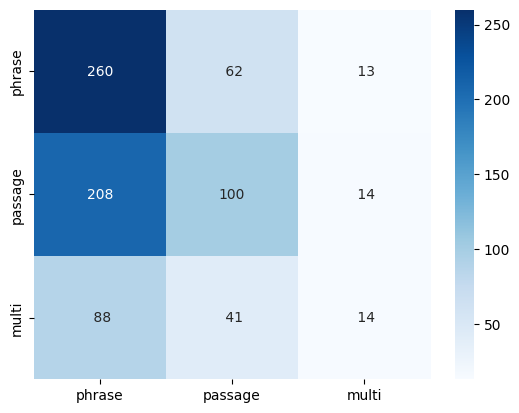

In [44]:
F1_scores_dict['dtc gini'] = F1_scores(y_test, y_pred_dtc_gini)
conf_matrix(y_test, y_pred_dtc_gini)

#### Decision Tree Classifier - entropy

In [30]:
dtc_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = 5, min_samples_leaf = 6)
dtc_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       random_state=123)

In [ ]:
y_pred_dtc_entropy = prediction(X_test, dtc_entropy)

F1: [59.31818182 38.94139887 20.94240838] 
F1 weighted: 44.25685717722409


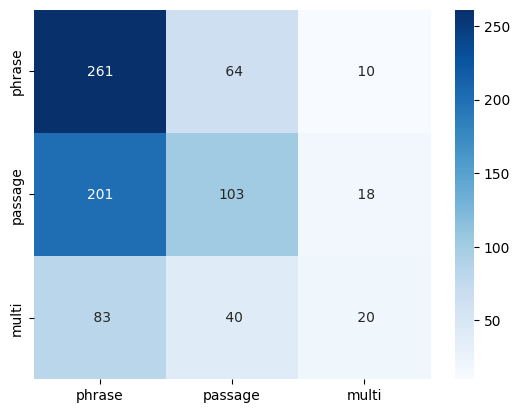

In [49]:
F1_scores_dict['dtc entropy'] = F1_scores(y_test, y_pred_dtc_entropy)
conf_matrix(y_test, y_pred_dtc_entropy)

#### SVM - linear kernel

In [45]:
svm_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm_linear.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [46]:
y_pred_svm_linear = prediction(X_test, svm_linear)

F1: [54.86486486 50.0736377  20.99447514] 
F1 weighted: 46.88206376835912


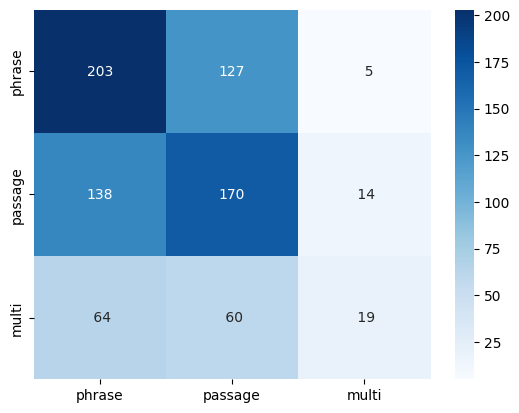

In [47]:
F1_scores_dict['svm linear'] = F1_scores(y_test, y_pred_svm_linear)
conf_matrix(y_test, y_pred_svm_linear)

#### SVM - rbf kernel

In [51]:
svm_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
svm_rbf.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', gamma=1)

In [52]:
y_pred_svm_rbf = prediction(X_test, svm_rbf)

F1: [58.06451613 48.10126582 12.34567901] 
F1 weighted: 45.88206574615994


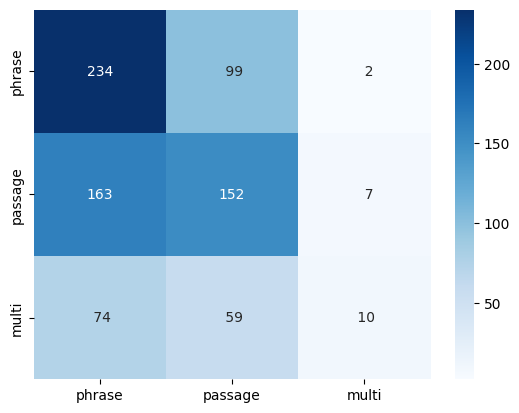

In [55]:
F1_scores_dict['svm rbf'] = F1_scores(y_test, y_pred_svm_rbf)
conf_matrix(y_test, y_pred_svm_rbf)

#### Naive Bayes

In [60]:
nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)

MultinomialNB()

In [61]:
y_pred_nb_multinomial = prediction(X_test, nb_multinomial)

F1: [56.60377358 45.32019704  0.        ] 
F1 weighted: 41.94420949902407


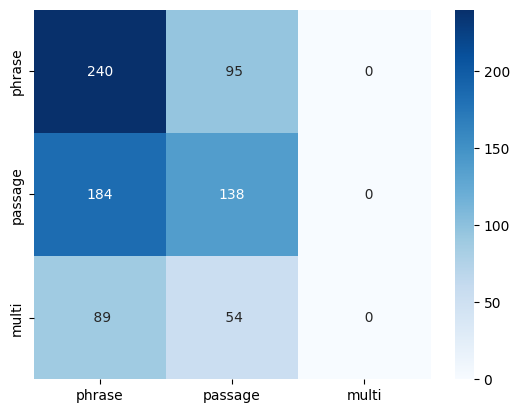

In [64]:
F1_scores_dict['nb multinomial'] = F1_scores(y_test, y_pred_nb_multinomial)
conf_matrix(y_test, y_pred_nb_multinomial)

#### Random Forest

In [54]:
rf_entropy = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [56]:
y_pred_rf_entropy = prediction(X_test, rf_entropy)

F1: [52.19638243 46.53312789 16.94915254] 
F1 weighted: 43.6164801344147


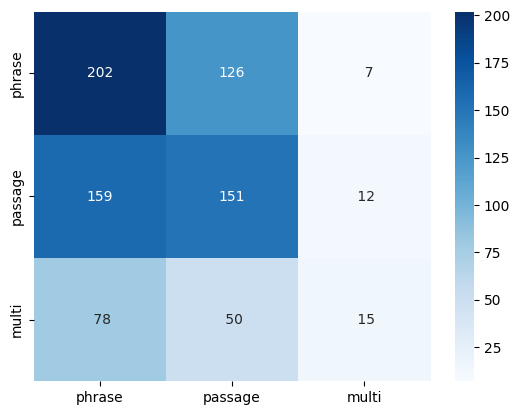

In [57]:
F1_scores_dict['rf entropy'] = F1_scores(y_test, y_pred_rf_entropy)
conf_matrix(y_test, y_pred_rf_entropy)

### Final F1 scores

In [65]:
F1_scores_dict

{'dtc gini': 42.49227480115161,
 'svm linear': 46.88206376835912,
 'dtc entropy': 44.25685717722409,
 'svm rbf': 45.88206574615994,
 'rf entropy': 43.6164801344147,
 'nb multinomial': 41.94420949902407}